<h3 align="center" style="font-size: 35px; color: #800080; font-family: Georgia;">
    <span style="color: #008080;"> Author:</span> 
    <span style="color: black;">SHIVENDRA PARMAR </span>
</h3>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

   
CONTENT:<br><br>
1. [Libraries](#1)
2. [Data Load and General Overview](#2)
3. [FEATURE ENGINEERING](#3)
4. [EDA](#4)
</div>
</div>

<a id = "1"></a>
# Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airline-dataset/Airline Dataset Updated.csv
/kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv
/kaggle/input/airline-dataset/Airline Dataset.csv


<a id = "2"></a>
# Data Load and General Overview

In [2]:
airline_dataset = pd.read_csv("/kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv")
# Copy df Protect for orginal dataset
df = airline_dataset.copy()

In [3]:
df

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Observe</font></h3>

* **Dataset has 15 features and 98619 samples.**
* **All features except age are categorical.**
* **Dataset has not missing values.**

<a id = "3"></a>
# FEATURE ENGINEERING

In [5]:
# remove Passenger ID, First Name, Last Name and Pilot Name from dataset
df.drop(["Passenger ID", "First Name", "Last Name", "Pilot Name"], axis = 1, inplace = True)
df

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,On Time
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,On Time
...,...,...,...,...,...,...,...,...,...,...,...
98614,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Cancelled
98615,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Cancelled
98616,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,On Time
98617,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Cancelled


In [6]:
# remove Airport Continent and Airport Country Code from dataset
df.drop(["Airport Continent","Airport Country Code"], axis = 1, inplace = True)
df

,Gender,Age,Nationality,Airport Name,Country Name,Continents,Departure Date,Arrival Airport,Flight Status
0,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,CXF,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,YCO,On Time
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,GNB,On Time
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,YND,Delayed
4,Male,21,China,Gillespie Field,United States,North America,2/25/2022,SEE,On Time
...,...,...,...,...,...,...,...,...,...
98614,Male,85,China,Hasvik Airport,Norway,Europe,12-11-2022,HAA,Cancelled
98615,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,10/30/2022,IVA,Cancelled
98616,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,09-10-2022,ABC,On Time
98617,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,10/26/2022,GGN,Cancelled


In [7]:
# Replace name some features
df.rename(columns={"Airport Name": "Airport_Name",
                  "Country Name": "Country_Name",
                  "Departure Date": "Departure_Date",
                  "Arrival Airport": "Arrival_Airport",
                  "Flight Status": "Flight_Status"},inplace = True)

In [8]:
# Create new features froom Departure Date
df.Departure_Date = df.Departure_Date.str.replace("-", "/")
df["Departure_Month"] = df.Departure_Date.str.split("/", expand = True)[0]
df["Departure_Day"] = df.Departure_Date.str.split("/", expand = True)[1]
df["Departure_Year"] = df.Departure_Date.str.split("/", expand = True)[2]
df.drop(["Departure_Date"], axis = 1, inplace = True)


In [9]:
df["Departure_Year"].nunique()

1

In [10]:
# Remove departure year from dataset
df.drop(["Departure_Year"], axis = 1, inplace = True)

In [11]:
df

,Gender,Age,Nationality,Airport_Name,Country_Name,Continents,Arrival_Airport,Flight_Status,Departure_Month,Departure_Day
0,Female,62,Japan,Coldfoot Airport,United States,North America,CXF,On Time,6,28
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,YCO,On Time,12,26
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,GNB,On Time,1,18
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,YND,Delayed,9,16
4,Male,21,China,Gillespie Field,United States,North America,SEE,On Time,2,25
...,...,...,...,...,...,...,...,...,...,...
98614,Male,85,China,Hasvik Airport,Norway,Europe,HAA,Cancelled,12,11
98615,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,IVA,Cancelled,10,30
98616,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,ABC,On Time,09,10
98617,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,GGN,Cancelled,10,26


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>To Done</font></h3>

* **We removed features with unique values (Passenger ID, First Name, Last Name and Pilot Name) from the dataset.**
* **Since Airport Country Code and Country Name express the same values and Airport Continent and Continents also express the same values, we extracted one of the features that express the same value.**
* **We created new features by splitting Departure Date into month, day and year. Also, since the year variable only has the value 2022, we removed it from the dataset.**

<a id = "4"></a>
# EDA

In [12]:
for col in df.columns:
    print(col, ".....:",df[col].nunique())

Gender .....: 2
Age .....: 90
Nationality .....: 240
Airport_Name .....: 9062
Country_Name .....: 235
Continents .....: 6
Arrival_Airport .....: 9024
Flight_Status .....: 3
Departure_Month .....: 21
Departure_Day .....: 31


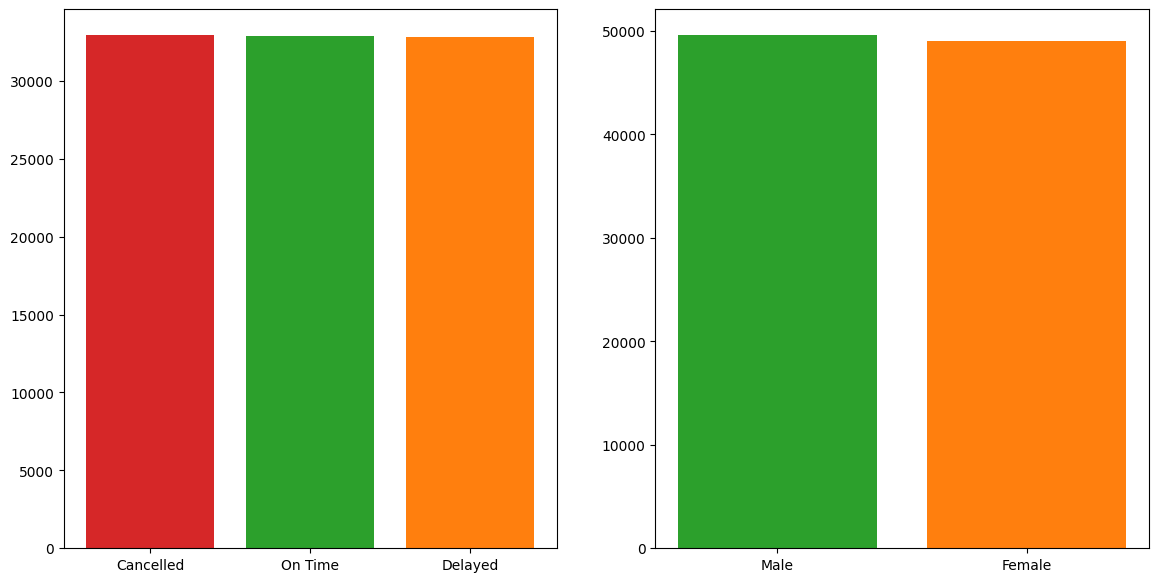

In [13]:
fig, ax = plt.subplots(ncols = 2,nrows = 1,figsize = (14,7))
flight_status = df.Flight_Status.value_counts().index
counts = df.Flight_Status.value_counts().values
ax[0].bar(flight_status, counts,color = ['tab:red', 'tab:green', 'tab:orange' ])
gender = df.Gender.value_counts().index
gender_counts = df.Gender.value_counts().values
ax[1].bar(gender, gender_counts, color = [ 'tab:green', 'tab:orange' ])
plt.show()

In [14]:
print(df.groupby("Flight_Status")["Gender"].value_counts())

Flight_Status  Gender
Cancelled      Male      16490
               Female    16452
Delayed        Male      16540
               Female    16291
On Time        Male      16568
               Female    16278
Name: count, dtype: int64


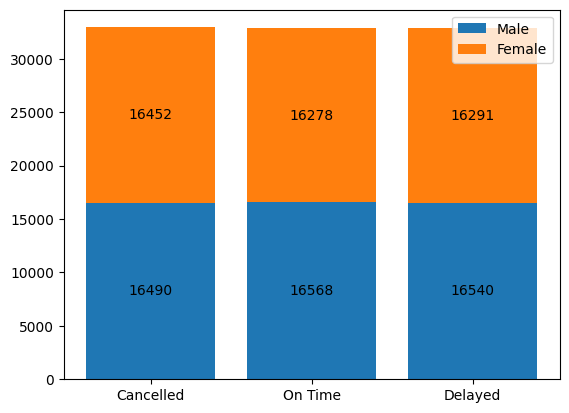

In [15]:
sex_counts = {
    "Male": np.array([16490,16568,16540]),
    "Female": np.array([16452,16278,16291])
}
fig,ax = plt.subplots()
bottom = np.zeros(3)
for sex, sex_count in sex_counts.items():
    p = ax.bar(flight_status,sex_count,label = sex, bottom = bottom)
    bottom+=sex_count
    ax.bar_label(p, label_type = "center")
ax.legend()
plt.show()

        min      mean  median  max
Gender                            
Female    1  45.51943    46.0   90
Male      1  45.48879    46.0   90


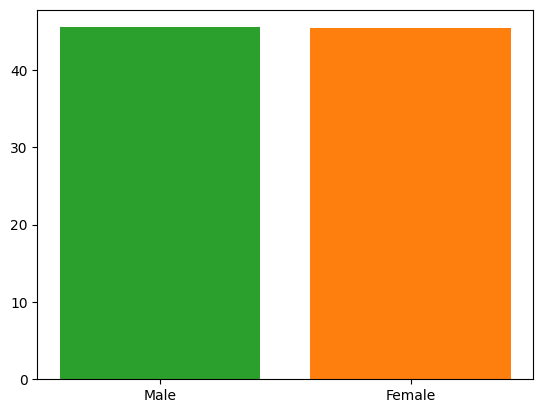

In [16]:
print(df.groupby("Gender")["Age"].agg(["min", "mean","median","max"]))
fig,ax= plt.subplots()
ax.bar(gender, df.groupby("Gender")["Age"].mean(), color = [ 'tab:green', 'tab:orange' ])
plt.show()

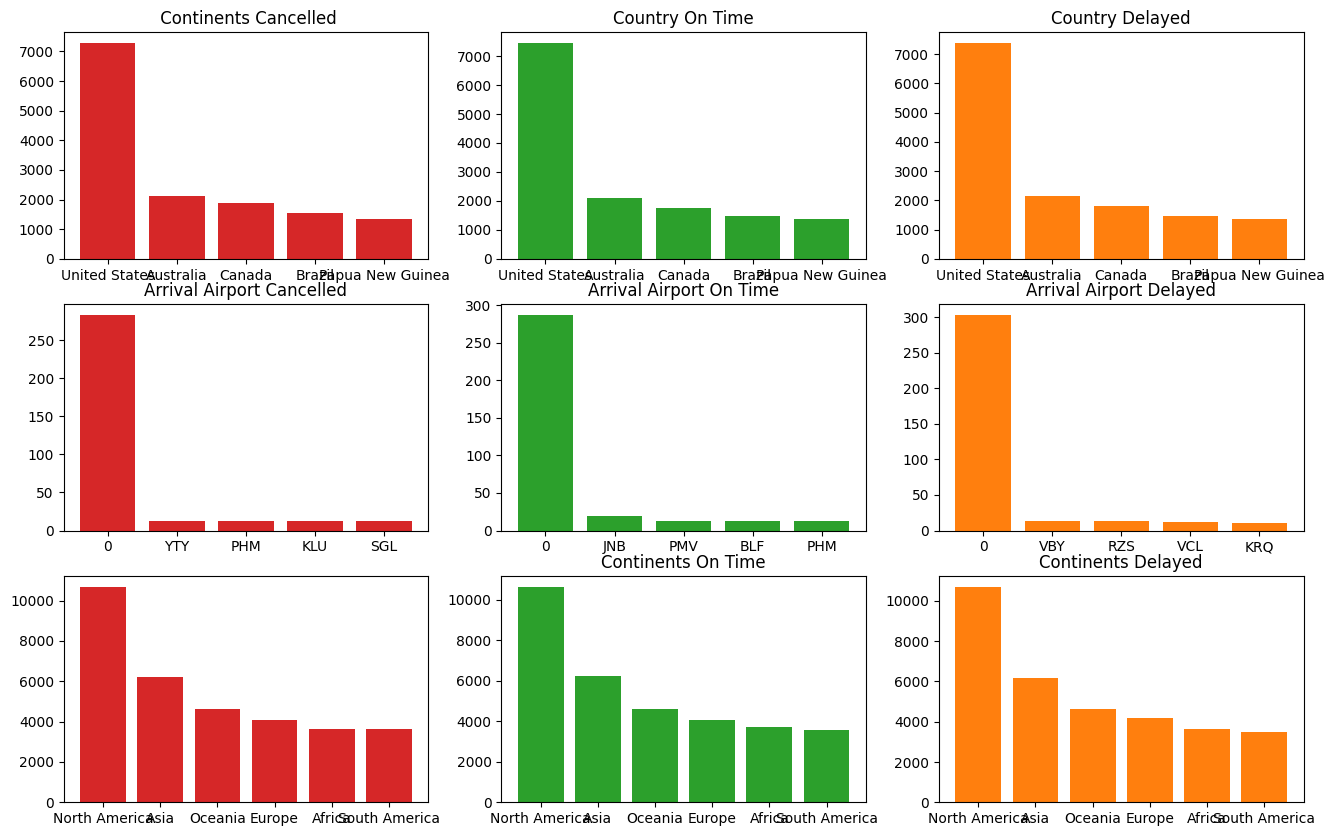

In [17]:

cancelled_dict = df[df["Flight_Status"] == "Cancelled"]["Country_Name"].value_counts()[0:5].to_dict()
ontime_dict = df[df["Flight_Status"] == "On Time"]["Country_Name"].value_counts()[0:5].to_dict()
delayed_dict = df[df["Flight_Status"] == "Delayed"]["Country_Name"].value_counts()[0:5].to_dict()

aa_cancelled_dict = df[df["Flight_Status"] == "Cancelled"]["Arrival_Airport"].value_counts()[0:5].to_dict()
aa_ontime_dict = df[df["Flight_Status"] == "On Time"]["Arrival_Airport"].value_counts()[0:5].to_dict()
aa_delayed_dict = df[df["Flight_Status"] == "Delayed"]["Arrival_Airport"].value_counts()[0:5].to_dict()

con_cancelled_dict = df[df["Flight_Status"] == "Cancelled"]["Continents"].value_counts().to_dict()
con_ontime_dict = df[df["Flight_Status"] == "On Time"]["Continents"].value_counts().to_dict()
con_delayed_dict = df[df["Flight_Status"] == "Delayed"]["Continents"].value_counts().to_dict()

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (16,10))
ax[0,0].bar(cancelled_dict.keys(),cancelled_dict.values(), color = 'tab:red')
ax[0,0].set_title(" Country Cancelled")
ax[0,1].bar(ontime_dict.keys(), ontime_dict.values(), color = 'tab:green')
ax[0,1].set_title("Country On Time")
ax[0,2].bar(delayed_dict.keys(), delayed_dict.values(), color = 'tab:orange')
ax[0,2].set_title("Country Delayed")
ax[1,0].bar(aa_cancelled_dict.keys(),aa_cancelled_dict.values(), color = 'tab:red')
ax[1,0].set_title("Arrival Airport Cancelled")
ax[1,1].bar(aa_ontime_dict.keys(), aa_ontime_dict.values(), color = 'tab:green')
ax[1,1].set_title("Arrival Airport On Time")
ax[1,2].bar(aa_delayed_dict.keys(), aa_delayed_dict.values(), color = 'tab:orange')
ax[1,2].set_title("Arrival Airport Delayed")
ax[2,0].bar(con_cancelled_dict.keys(),con_cancelled_dict.values(), color = 'tab:red')
ax[0,0].set_title(" Continents Cancelled")
ax[2,1].bar(con_ontime_dict.keys(), con_ontime_dict.values(), color = 'tab:green')
ax[2,1].set_title("Continents On Time")
ax[2,2].bar(con_delayed_dict.keys(), con_delayed_dict.values(), color = 'tab:orange')
ax[2,2].set_title("Continents Delayed")
plt.show()

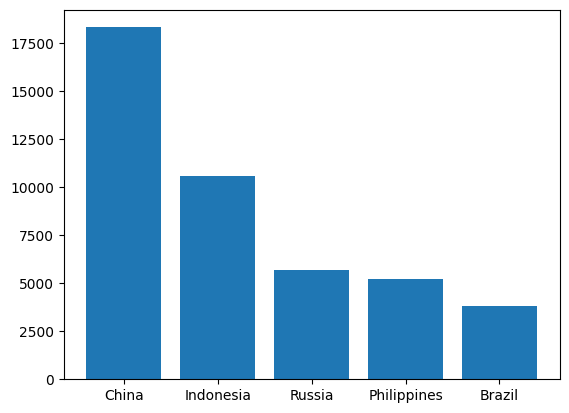

In [18]:
fig, ax = plt.subplots()
national = df.Nationality.value_counts()[:5].index
nat_counts = df.Nationality.value_counts()[:5].values
ax.bar(national, nat_counts)
plt.show()

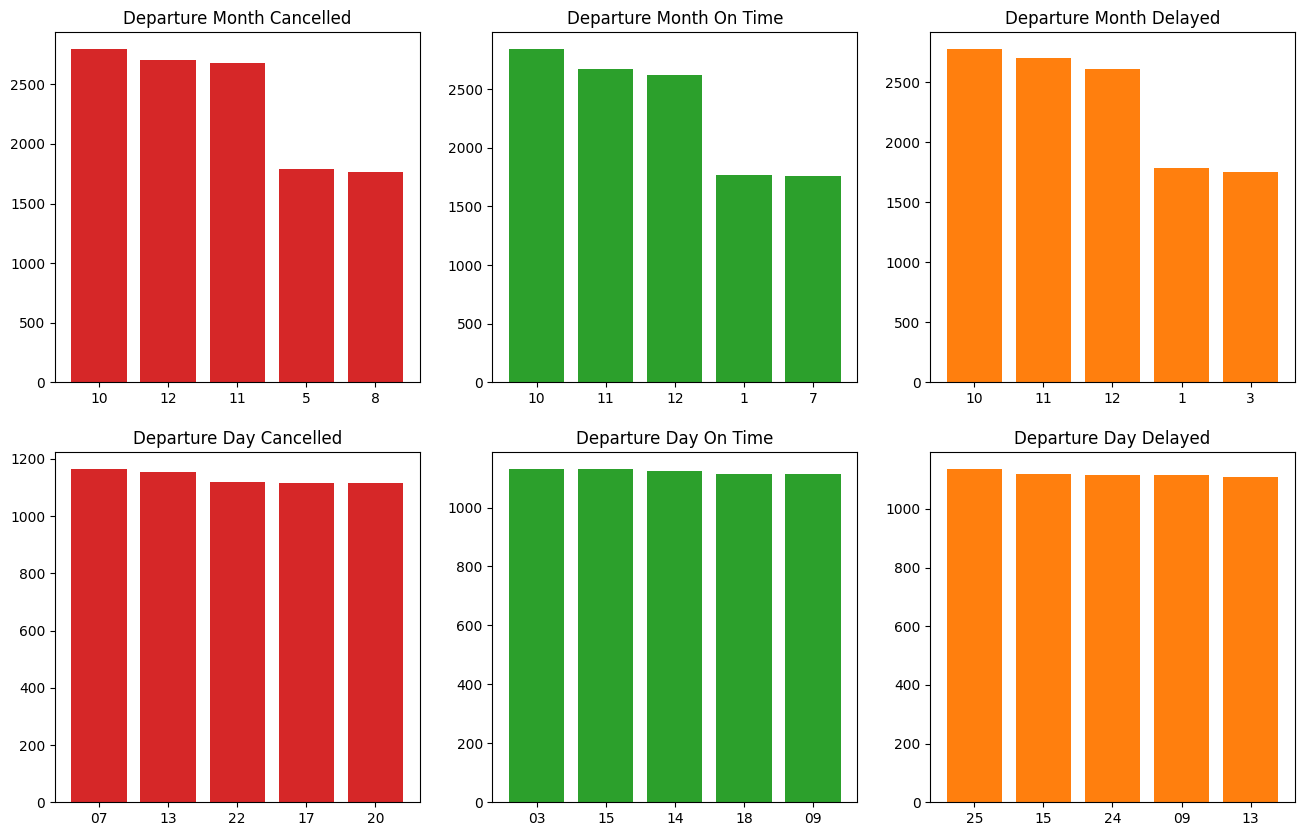

In [19]:
month_cancelled_dict = df[df["Flight_Status"] == "Cancelled"]["Departure_Month"].value_counts()[0:5].to_dict()
month_ontime_dict = df[df["Flight_Status"] == "On Time"]["Departure_Month"].value_counts()[0:5].to_dict()
month_delayed_dict = df[df["Flight_Status"] == "Delayed"]["Departure_Month"].value_counts()[0:5].to_dict()

day_cancelled_dict = df[df["Flight_Status"] == "Cancelled"]["Departure_Day"].value_counts()[0:5].to_dict()
day_ontime_dict = df[df["Flight_Status"] == "On Time"]["Departure_Day"].value_counts()[0:5].to_dict()
day_delayed_dict = df[df["Flight_Status"] == "Delayed"]["Departure_Day"].value_counts()[0:5].to_dict()

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10))
ax[0,0].bar(month_cancelled_dict.keys(),month_cancelled_dict.values(), color = 'tab:red')
ax[0,0].set_title("Departure Month Cancelled")
ax[0,1].bar(month_ontime_dict.keys(), month_ontime_dict.values(), color = 'tab:green')
ax[0,1].set_title("Departure Month On Time")
ax[0,2].bar(month_delayed_dict.keys(), month_delayed_dict.values(), color = 'tab:orange')
ax[0,2].set_title("Departure Month Delayed")
ax[1,0].bar(day_cancelled_dict.keys(),day_cancelled_dict.values(), color = 'tab:red')
ax[1,0].set_title("Departure Day Cancelled")
ax[1,1].bar(day_ontime_dict.keys(), day_ontime_dict.values(), color = 'tab:green')
ax[1,1].set_title("Departure Day On Time")
ax[1,2].bar(day_delayed_dict.keys(), day_delayed_dict.values(), color = 'tab:orange')
ax[1,2].set_title("Departure Day Delayed")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Observe</font></h3>

* **The frequency of the variables of flight status is almost equal.In addition, the number of men and women in flight status is almost the same, so it can be said that gender is not effective in flight status.**
* **As a country, we observed that the US had the highest number of on-time, delayed or canceled flights.As a arrival airport that the 0 had the highest number of on-time, delayed or canceled flights.But zero here means the unknown. And as a continents,that the North America had the highest number of on-time, delayed or canceled flights. Of course, this is due to the fact that the US is the country with the highest number of on-time, delayed and canceled flights.**
* **In terms of nationality, Chinese passengers are the most numerous and even account for almost 20 percent of all observations.**
* **In terms of departure month, on-time, delayed and canceled flights were most common in months 10, 11 and 12. This shows that most flights took place in these months and that the month has no effect on the flight status. However, it is observed that the departure days are different in three flight cases and it is determined that this situation, that is, the day of departure, has an effect on the flight status.**